# ENOVA Data Smackdown | Team 2 Submission

This is the submission for Team 2. It contains the code to be able to reproduce our outputs.

1. Let us import some basic libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

2. Let us read the data from the *data_smackdown_2023_training.csv*

In [5]:
df=pd.read_csv('data_smackdown_2023_training.csv',parse_dates=['last_activity_social'])
df.head()

,age,residence_type,address,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,last_ticket_purchase_year,other_tickets_purchased,...,prior_year_spend_external,primary_credit_card,last_activity_social,other_streaming_services,cable_provider,search_history_summary,rating_history,promotion_type,conversion_ind,ltv
0,74,U,"164 Gonzalez Common, Brittanyberg, FL 32854",grad_high_school,government,10,1,1.0,2019.0,"['bsb', 'fb', 'fb', 'fb', 'c']",...,5.20,maincard,2018-01-17,3,Fish Network,"['majorwrestlingmagazine.com', 'firstwildlifec...",NaN,bronze,0.0,0.000000
1,51,U,"23531 Christopher Points Unit 185, Lake Daniel...",phd,healthcare,7,0,2.0,2013.0,"['c', 'bsb', 'fb', 'c', 'c', 'bxb', 'fb', 'c',...",...,247.43,maincard,2020-05-16,2,Cheezeline,"['totaltechnews.com', 'firstoutdoorreport.com'...",NaN,bronze,1.0,3147.898930
2,42,U,"90970 Aguirre Isle Apt. 387, South Laurastad, ...",grad_high_school,service,7,1,4.0,2011.0,"['c', 'fb', 'fb', 'fb', 's', 's', 'fb', 'fb', ...",...,69.45,passport,NaT,5,Spectral,"['totalpoliticsclips.com', 'dailyfinancenews.c...",NaN,bronze,0.0,0.000000
3,61,U,"17916 Stacey Freeway, West Laura, CA 94036",grad_college,retail,8,1,0.0,NaN,"['bsb', 'c', 'fb', 'fb', 'c', 'bsb', 'bsb', 'f...",...,482.98,passport,2017-08-24,2,NaN,"['majorfurniturenews.com', 'actionmarketmagazi...",NaN,gold,1.0,1569.613367
4,48,S,"052 Carla Plaza Apt. 039, Taylorhaven, CA 92901",masters_professional,education,6,1,2.0,2021.0,"['fb', 'fb', 'c', 'fb', 'fb', 'bxb', 's', 'bxb...",...,170.83,pursuit,2022-08-23,2,NaN,"['UBCbooksreport.com', 'politicsreport.com', '...",NaN,silver,1.0,3411.585503


3. Now that we have the Training Data Set, let us perform a pandas info to take a look at the features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        10001 non-null  int64         
 1   residence_type             10001 non-null  object        
 2   address                    10001 non-null  object        
 3   education_level            10001 non-null  object        
 4   job_type                   9054 non-null   object        
 5   number_years_at_job        10001 non-null  int64         
 6   marital_status             10001 non-null  int64         
 7   num_tickets_purchased      10001 non-null  float64       
 8   last_ticket_purchase_year  5867 non-null   float64       
 9   other_tickets_purchased    8192 non-null   object        
 10  gym_membership_ind         10001 non-null  int64         
 11  prior_year_spend           7164 non-null   float64       
 12  prio

4. We have decided to drop Address and Rating History, as
- The Address feature did not seem to contribute anything.
- The Rating History feature had too many nulls to be worth using as a feature.

In [7]:
df_changed=df.drop(['address','rating_history'],axis=1)
df_changed.head()

,age,residence_type,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,last_ticket_purchase_year,other_tickets_purchased,gym_membership_ind,prior_year_spend,prior_year_spend_external,primary_credit_card,last_activity_social,other_streaming_services,cable_provider,search_history_summary,promotion_type,conversion_ind,ltv
0,74,U,grad_high_school,government,10,1,1.0,2019.0,"['bsb', 'fb', 'fb', 'fb', 'c']",1,9.10,5.20,maincard,2018-01-17,3,Fish Network,"['majorwrestlingmagazine.com', 'firstwildlifec...",bronze,0.0,0.000000
1,51,U,phd,healthcare,7,0,2.0,2013.0,"['c', 'bsb', 'fb', 'c', 'c', 'bxb', 'fb', 'c',...",0,27.45,247.43,maincard,2020-05-16,2,Cheezeline,"['totaltechnews.com', 'firstoutdoorreport.com'...",bronze,1.0,3147.898930
2,42,U,grad_high_school,service,7,1,4.0,2011.0,"['c', 'fb', 'fb', 'fb', 's', 's', 'fb', 'fb', ...",0,63.63,69.45,passport,NaT,5,Spectral,"['totalpoliticsclips.com', 'dailyfinancenews.c...",bronze,0.0,0.000000
3,61,U,grad_college,retail,8,1,0.0,NaN,"['bsb', 'c', 'fb', 'fb', 'c', 'bsb', 'bsb', 'f...",0,23.16,482.98,passport,2017-08-24,2,NaN,"['majorfurniturenews.com', 'actionmarketmagazi...",gold,1.0,1569.613367
4,48,S,masters_professional,education,6,1,2.0,2021.0,"['fb', 'fb', 'c', 'fb', 'fb', 'bxb', 's', 'bxb...",1,NaN,170.83,pursuit,2022-08-23,2,NaN,"['UBCbooksreport.com', 'politicsreport.com', '...",silver,1.0,3411.585503


5. Let us take a look at the Job Type Feature. 

In [8]:
df_changed['job_type'].value_counts()

service       1590
retail        1495
business       952
education      842
tech           709
government     633
marketing      599
healthcare     574
childcare      532
none           470
finance        456
legal          202
Name: job_type, dtype: int64

5.1 As we can see that the Service type is the largest, we can replace the *NA* with it.

In [9]:
df_changed['job_type']=df['job_type'].fillna('service')

6. let us take a look at the remaining features.

In [10]:
df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        10001 non-null  int64         
 1   residence_type             10001 non-null  object        
 2   education_level            10001 non-null  object        
 3   job_type                   10001 non-null  object        
 4   number_years_at_job        10001 non-null  int64         
 5   marital_status             10001 non-null  int64         
 6   num_tickets_purchased      10001 non-null  float64       
 7   last_ticket_purchase_year  5867 non-null   float64       
 8   other_tickets_purchased    8192 non-null   object        
 9   gym_membership_ind         10001 non-null  int64         
 10  prior_year_spend           7164 non-null   float64       
 11  prior_year_spend_external  8053 non-null   float64       
 12  prim

7. Let us take a look at the last ticket purchase year

In [11]:
df_changed['last_ticket_purchase_year'].value_counts()

2022.0    592
2020.0    535
2021.0    516
2019.0    484
2018.0    461
2017.0    461
2016.0    448
2012.0    434
2015.0    423
2013.0    415
2014.0    404
2011.0    352
2010.0    342
Name: last_ticket_purchase_year, dtype: int64

7.1 We believe that any one who purchased a ticket was important, so anyone who hasnt has been labeled as 0

In [12]:
df_changed['is_ticket_purchased']=df_changed['last_ticket_purchase_year'].apply(lambda x: 0 if np.isnan(x) else 1)
df_changed.head()

,age,residence_type,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,last_ticket_purchase_year,other_tickets_purchased,gym_membership_ind,...,prior_year_spend_external,primary_credit_card,last_activity_social,other_streaming_services,cable_provider,search_history_summary,promotion_type,conversion_ind,ltv,is_ticket_purchased
0,74,U,grad_high_school,government,10,1,1.0,2019.0,"['bsb', 'fb', 'fb', 'fb', 'c']",1,...,5.20,maincard,2018-01-17,3,Fish Network,"['majorwrestlingmagazine.com', 'firstwildlifec...",bronze,0.0,0.000000,1
1,51,U,phd,healthcare,7,0,2.0,2013.0,"['c', 'bsb', 'fb', 'c', 'c', 'bxb', 'fb', 'c',...",0,...,247.43,maincard,2020-05-16,2,Cheezeline,"['totaltechnews.com', 'firstoutdoorreport.com'...",bronze,1.0,3147.898930,1
2,42,U,grad_high_school,service,7,1,4.0,2011.0,"['c', 'fb', 'fb', 'fb', 's', 's', 'fb', 'fb', ...",0,...,69.45,passport,NaT,5,Spectral,"['totalpoliticsclips.com', 'dailyfinancenews.c...",bronze,0.0,0.000000,1
3,61,U,grad_college,retail,8,1,0.0,NaN,"['bsb', 'c', 'fb', 'fb', 'c', 'bsb', 'bsb', 'f...",0,...,482.98,passport,2017-08-24,2,NaN,"['majorfurniturenews.com', 'actionmarketmagazi...",gold,1.0,1569.613367,0
4,48,S,masters_professional,education,6,1,2.0,2021.0,"['fb', 'fb', 'c', 'fb', 'fb', 'bxb', 's', 'bxb...",1,...,170.83,pursuit,2022-08-23,2,NaN,"['UBCbooksreport.com', 'politicsreport.com', '...",silver,1.0,3411.585503,1


7.2 Let us now plot the years to see if any period impacts the conversion

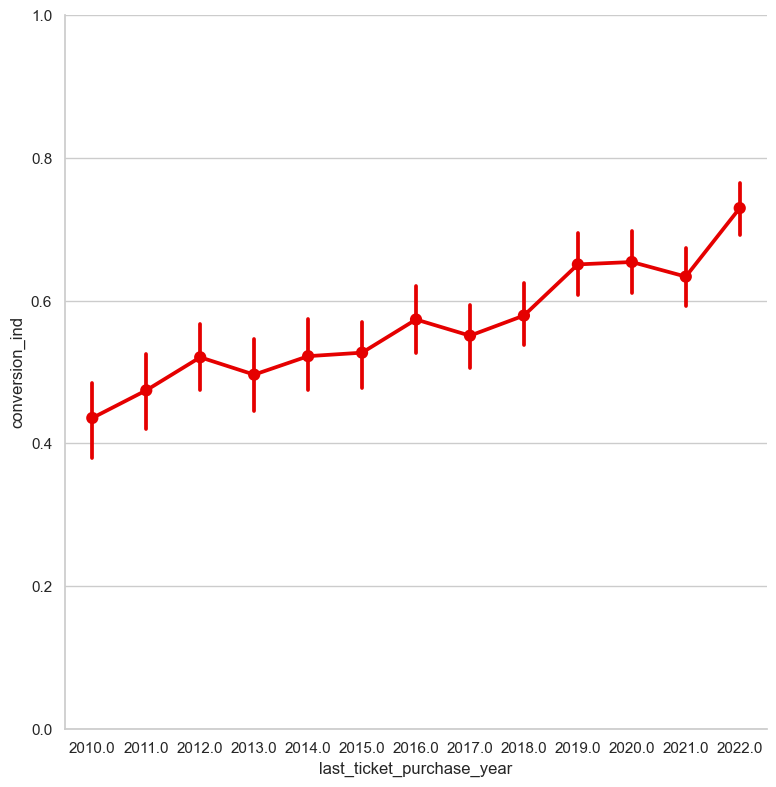

In [18]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df_changed, x_vars=['last_ticket_purchase_year'], y_vars='conversion_ind',height=8)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

7.3 As we can see, the years can be collated into three different sections: 2019+ , 2015-2018+, 2010-2015

In [13]:
df_changed['ticket_purchased_recency']=df_changed['last_ticket_purchase_year'].apply(lambda x: '2019+' if x>=2019 else ('2015-2018' if x >=2015 else ('2010-2015' if x>=2010 else 0)))
df_changed.head()

,age,residence_type,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,last_ticket_purchase_year,other_tickets_purchased,gym_membership_ind,...,primary_credit_card,last_activity_social,other_streaming_services,cable_provider,search_history_summary,promotion_type,conversion_ind,ltv,is_ticket_purchased,ticket_purchased_recency
0,74,U,grad_high_school,government,10,1,1.0,2019.0,"['bsb', 'fb', 'fb', 'fb', 'c']",1,...,maincard,2018-01-17,3,Fish Network,"['majorwrestlingmagazine.com', 'firstwildlifec...",bronze,0.0,0.000000,1,2019+
1,51,U,phd,healthcare,7,0,2.0,2013.0,"['c', 'bsb', 'fb', 'c', 'c', 'bxb', 'fb', 'c',...",0,...,maincard,2020-05-16,2,Cheezeline,"['totaltechnews.com', 'firstoutdoorreport.com'...",bronze,1.0,3147.898930,1,2010-2015
2,42,U,grad_high_school,service,7,1,4.0,2011.0,"['c', 'fb', 'fb', 'fb', 's', 's', 'fb', 'fb', ...",0,...,passport,NaT,5,Spectral,"['totalpoliticsclips.com', 'dailyfinancenews.c...",bronze,0.0,0.000000,1,2010-2015
3,61,U,grad_college,retail,8,1,0.0,NaN,"['bsb', 'c', 'fb', 'fb', 'c', 'bsb', 'bsb', 'f...",0,...,passport,2017-08-24,2,NaN,"['majorfurniturenews.com', 'actionmarketmagazi...",gold,1.0,1569.613367,0,0
4,48,S,masters_professional,education,6,1,2.0,2021.0,"['fb', 'fb', 'c', 'fb', 'fb', 'bxb', 's', 'bxb...",1,...,pursuit,2022-08-23,2,NaN,"['UBCbooksreport.com', 'politicsreport.com', '...",silver,1.0,3411.585503,1,2019+


In [19]:
df_changed_2=df_changed.drop(['last_ticket_purchase_year'],axis=1)
df_changed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        10001 non-null  int64         
 1   residence_type             10001 non-null  object        
 2   education_level            10001 non-null  object        
 3   job_type                   10001 non-null  object        
 4   number_years_at_job        10001 non-null  int64         
 5   marital_status             10001 non-null  int64         
 6   num_tickets_purchased      10001 non-null  float64       
 7   other_tickets_purchased    8192 non-null   object        
 8   gym_membership_ind         10001 non-null  int64         
 9   prior_year_spend           7164 non-null   float64       
 10  prior_year_spend_external  8053 non-null   float64       
 11  primary_credit_card        8053 non-null   object        
 12  last

8. Lets take a look at the Cable Providers

In [20]:
df_changed_2['cable_provider'].value_counts()

Infinity        2146
Spectral        1893
DefecTV         1745
Fish Network     902
ShrewTube        680
Suboptimal       270
Fish network     148
Cheezeline       116
Sub-optimal       11
Infinty            1
Name: cable_provider, dtype: int64

8.1 Let us correct the categories.

In [21]:
df_changed_2.loc[df.cable_provider=='Infinty','cable_provider']="Infinity"
df_changed_2.loc[df.cable_provider=='Fish network','cable_provider']="Fish Network"
df_changed_2.loc[df.cable_provider=='Sub-optimal','cable_provider']="Suboptimal"

8.2 Let us visualize the Categories against the conversion.

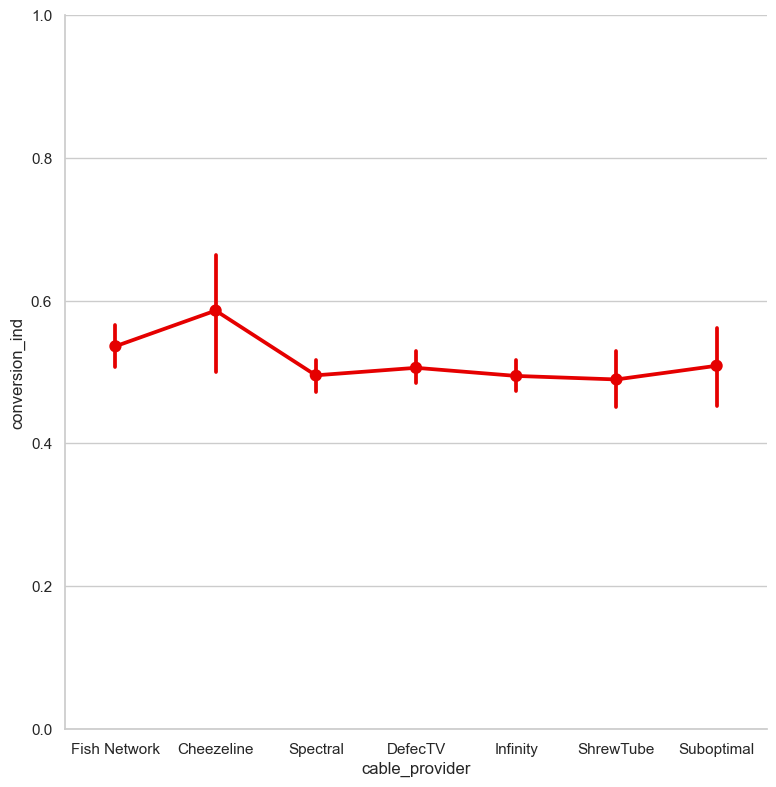

In [23]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df_changed_2, x_vars=['cable_provider'], y_vars='conversion_ind', height=8)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

8.2 As there is no majority, lets make the na's into a new category.

In [24]:
df_changed_3=df_changed_2.copy()
df_changed_3['cable_provider']=df_changed_3['cable_provider'].fillna('No_Cable')
df_changed_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        10001 non-null  int64         
 1   residence_type             10001 non-null  object        
 2   education_level            10001 non-null  object        
 3   job_type                   10001 non-null  object        
 4   number_years_at_job        10001 non-null  int64         
 5   marital_status             10001 non-null  int64         
 6   num_tickets_purchased      10001 non-null  float64       
 7   other_tickets_purchased    8192 non-null   object        
 8   gym_membership_ind         10001 non-null  int64         
 9   prior_year_spend           7164 non-null   float64       
 10  prior_year_spend_external  8053 non-null   float64       
 11  primary_credit_card        8053 non-null   object        
 12  last

9. Let us take a look at the prior year

In [26]:
df_changed_3['prior_year_spend'].describe()

count     7164.000000
mean        27.664781
std        149.957682
min          0.000000
25%          6.427500
50%         15.650000
75%         34.275000
max      10438.770000
Name: prior_year_spend, dtype: float64

9.1 let us set the *NA* to 0

In [27]:
df_changed_3['prior_year_spend']=df_changed_3['prior_year_spend'].fillna(0)
df_changed_3['prior_year_spend_external']=df_changed_3['prior_year_spend_external'].fillna(0)

In [28]:
df_changed_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        10001 non-null  int64         
 1   residence_type             10001 non-null  object        
 2   education_level            10001 non-null  object        
 3   job_type                   10001 non-null  object        
 4   number_years_at_job        10001 non-null  int64         
 5   marital_status             10001 non-null  int64         
 6   num_tickets_purchased      10001 non-null  float64       
 7   other_tickets_purchased    8192 non-null   object        
 8   gym_membership_ind         10001 non-null  int64         
 9   prior_year_spend           10001 non-null  float64       
 10  prior_year_spend_external  10001 non-null  float64       
 11  primary_credit_card        8053 non-null   object        
 12  last

10. Let us take a look at the primary credit card feature. We can correct a few spelling issues, and convert it to all lowercase.

In [30]:
df_changed_4=df_changed_3.copy()
df_changed_4.loc[df_changed_4.primary_credit_card=="PASSPORT","primary_credit_card"]="passport"  
df_changed_4.loc[df_changed_4.primary_credit_card=="passsport","primary_credit_card"]="passport"
df_changed_4.loc[df_changed_4.primary_credit_card=="Locate","primary_credit_card"]="locate"
df_changed_4.loc[df_changed_4.primary_credit_card=="mainCard","primary_credit_card"]="maincard"

10.1 Let us now set the *NA* to another category none

In [31]:
df_changed_4.loc[df_changed_4.primary_credit_card.isna(),"primary_credit_card"]="none"

In [33]:
df_changed_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        10001 non-null  int64         
 1   residence_type             10001 non-null  object        
 2   education_level            10001 non-null  object        
 3   job_type                   10001 non-null  object        
 4   number_years_at_job        10001 non-null  int64         
 5   marital_status             10001 non-null  int64         
 6   num_tickets_purchased      10001 non-null  float64       
 7   other_tickets_purchased    8192 non-null   object        
 8   gym_membership_ind         10001 non-null  int64         
 9   prior_year_spend           10001 non-null  float64       
 10  prior_year_spend_external  10001 non-null  float64       
 11  primary_credit_card        10001 non-null  object        
 12  last

11. Making dummy variables out of every website would be too tedious lets instead do a simple search and check if the string wrest is part of the list of websites. Find the percentage of the total will give us a good idea about the previous search history.

In [34]:
def find_wrestle_website(website):
  website_list = str(website).replace('\'',"").strip('][').split(', ')
  value = str(website).lower()
  count = len([i.start() for i in re.finditer("wrest",value)])
  return round(count/len(website_list)*100)

In [35]:
df_changed_5=df_changed_4.copy()

In [37]:
df_changed_5["Search_history_percentage"] = df_changed_5["search_history_summary"].apply(find_wrestle_website) 

12. We can use the number of previous tickets purchased to be used as in indication of how likely they might be to purchasing a ticket as well.

In [39]:
def find_numberof_tickets(tickets):
  tickets_list = str(tickets).replace('\'',"").strip('][').split(', ')
  return len(tickets_list)

In [40]:
df_changed_5["count_other_tickets_purchased"] = df_changed_5["other_tickets_purchased"].apply(find_numberof_tickets)

In [41]:
df_changed_5=df_changed_5.drop(['other_tickets_purchased','search_history_summary'],axis=1)

In [42]:
df_changed_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   age                            10001 non-null  int64         
 1   residence_type                 10001 non-null  object        
 2   education_level                10001 non-null  object        
 3   job_type                       10001 non-null  object        
 4   number_years_at_job            10001 non-null  int64         
 5   marital_status                 10001 non-null  int64         
 6   num_tickets_purchased          10001 non-null  float64       
 7   gym_membership_ind             10001 non-null  int64         
 8   prior_year_spend               10001 non-null  float64       
 9   prior_year_spend_external      10001 non-null  float64       
 10  primary_credit_card            10001 non-null  object        
 11  last_activity_s

13. We dropped the last activity social column as we found that it had way too many nulls to estimate with

In [43]:
df_changed_6=df_changed_5.copy()
df_changed_6=df_changed_6.drop(['last_activity_social'],axis=1)
df_changed_6.head()

,age,residence_type,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,gym_membership_ind,prior_year_spend,prior_year_spend_external,primary_credit_card,other_streaming_services,cable_provider,promotion_type,conversion_ind,ltv,is_ticket_purchased,ticket_purchased_recency,Search_history_percentage,count_other_tickets_purchased
0,74,U,grad_high_school,government,10,1,1.0,1,9.10,5.20,maincard,3,Fish Network,bronze,0.0,0.000000,1,2019+,17,5
1,51,U,phd,healthcare,7,0,2.0,0,27.45,247.43,maincard,2,Cheezeline,bronze,1.0,3147.898930,1,2010-2015,20,10
2,42,U,grad_high_school,service,7,1,4.0,0,63.63,69.45,passport,5,Spectral,bronze,0.0,0.000000,1,2010-2015,43,10
3,61,U,grad_college,retail,8,1,0.0,0,23.16,482.98,passport,2,No_Cable,gold,1.0,1569.613367,0,0,0,10
4,48,S,masters_professional,education,6,1,2.0,1,0.00,170.83,pursuit,2,No_Cable,silver,1.0,3411.585503,1,2019+,14,10


14. Getting the Dummy Variables

In [44]:
df_changed_7=pd.get_dummies(df_changed_6, prefix='is',columns=['residence_type','education_level','job_type','primary_credit_card','cable_provider','ticket_purchased_recency'])

In [45]:
df_changed_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10001 non-null  int64  
 1   number_years_at_job            10001 non-null  int64  
 2   marital_status                 10001 non-null  int64  
 3   num_tickets_purchased          10001 non-null  float64
 4   gym_membership_ind             10001 non-null  int64  
 5   prior_year_spend               10001 non-null  float64
 6   prior_year_spend_external      10001 non-null  float64
 7   other_streaming_services       10001 non-null  int64  
 8   promotion_type                 10001 non-null  object 
 9   conversion_ind                 10001 non-null  float64
 10  ltv                            10001 non-null  float64
 11  is_ticket_purchased            10001 non-null  int64  
 12  Search_history_percentage      10001 non-null 

15. Creating a backup of our processed training data

In [ ]:
df_changed_7.to_csv('Train_processed_km.csv')

## Modelling

1. Dropping the promotion type and the conversion_ind columns

In [50]:
X=df_changed_7.drop(['promotion_type','conversion_ind','ltv'],axis=1)

In [47]:
y=df_changed_7['conversion_ind']

2. lets create the train and test split

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8, test_size=0.2, stratify=y,random_state=0)

In [56]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (8000, 50)
X_test:  (2001, 50)
y_train:  (8000,)
y_test:  (2001,)


In [57]:
y.value_counts()

1.0    5040
0.0    4961
Name: conversion_ind, dtype: int64

3. Let us define the models we are using and run the data through them

In [58]:
def first_classifier(model):
    classifier = model()
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test)*100,'%')
    return classifier

In [59]:
mods = [LogisticRegression,LinearSVC,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,GaussianNB,Perceptron,SGDClassifier]
mods

[sklearn.linear_model._logistic.LogisticRegression,
 sklearn.svm._classes.LinearSVC,
 sklearn.neighbors._classification.KNeighborsClassifier,
 sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.naive_bayes.GaussianNB,
 sklearn.linear_model._perceptron.Perceptron,
 sklearn.linear_model._stochastic_gradient.SGDClassifier]

In [60]:
for i in mods:
    print(i)
    mod_run=first_classifier(i)
    print(mod_run)
    print('\n')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
70.61469265367316 %
LogisticRegression()


<class 'sklearn.svm._classes.LinearSVC'>


c:\Users\yomaa\Documents\Github\University-of-Chicago\Environment\uchicago_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yomaa\Documents\Github\University-of-Chicago\Environment\uchicago_venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


57.521239380309844 %
LinearSVC()


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
65.81709145427287 %
KNeighborsClassifier()


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
64.26786606696652 %
DecisionTreeClassifier()


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
71.01449275362319 %
RandomForestClassifier()


<class 'sklearn.naive_bayes.GaussianNB'>
65.5672163918041 %
GaussianNB()


<class 'sklearn.linear_model._perceptron.Perceptron'>
64.46776611694153 %
Perceptron()


<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
69.36531734132933 %
SGDClassifier()




As we can see the logistic regressor has the best score

4. let us make the logistic regressor model

In [61]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_pred_log_reg_clf1 = clf1.predict(X_test)
acc_log_reg_clf1 = round( clf1.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg_clf1) + ' percent')

70.61 percent


c:\Users\yomaa\Documents\Github\University-of-Chicago\Environment\uchicago_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
y_pred_log_reg_clf1

array([1., 0., 0., ..., 0., 0., 0.])

### Creating the Model for the Linear Regressor

In [63]:
df_changed_8 = df_changed_7.copy()

In [66]:
df_changed_8=df_changed_8[df_changed_8["conversion_ind"]==1]
df_changed_8.drop("promotion_type",axis=1, inplace=True)
df_changed_8.drop("conversion_ind",axis=1, inplace=True)

In [67]:
linear_X = df_changed_8.drop("ltv", axis=1)
linear_y = df_changed_8.ltv

In [70]:
# X is your feature data, y is your target data
X_train, X_test, y_train, y_test = train_test_split(linear_X, linear_y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Predict X_test
prediction = model.predict(X_test)

#calculate RMSE
RMSE1 = sqrt(mean_squared_error(prediction, y_test)) 

#print(RMSE)
print("RMSE",RMSE1)

prediction

RMSE 491.2127473217238


array([1344.16245704, 2549.69407228, 1379.43079925, ..., 1552.17907983,
       2472.94173684, 2294.30440468])

### Predictions

1. let us now read the validation file and perform the same preprocessing files.

In [72]:
df_hold=pd.read_csv('data_smackdown_2023_validation.csv')
df_hold.head()

,id,age,residence_type,address,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,last_ticket_purchase_year,...,gym_membership_ind,prior_year_spend,prior_year_spend_external,primary_credit_card,last_activity_social,other_streaming_services,cable_provider,search_history_summary,rating_history,promotion_type
0,0,44,S,"08701 James Terrace Unit 813, East Andrewchest...",no_hs_diploma,none,14,1,9.0,2015.0,...,0,26.79,98.26,maincard,NaN,4,Spectral,"['firstpolitics.com', 'nationalfinancenews.com...",NaN,NaN
1,1,31,U,"623 Amanda Corners, Lake Josephside, NJ 7620",grad_college,education,7,0,25.0,2014.0,...,1,NaN,226.93,SLAMEX,2022-10-06,1,DefecTV,"['totalwildlifereport.com', 'totalpoliticsrepo...",NaN,NaN
2,2,28,S,"659 Peck Plaza Unit 333, East Raymondborough, ...",grad_high_school,service,8,0,0.0,NaN,...,0,15.44,21.84,passport,2019-11-19,2,DefecTV,"['premierfurnitureinfo.com', 'firstcampingclip...",NaN,NaN
3,3,61,U,"6896 Morgan Rest Apt. 120, West Thomas, CA 93219",no_hs_diploma,none,16,0,6.0,2015.0,...,0,11.46,13.11,maincard,2018-05-21,4,NaN,"['dailytech.com', 'premierrecipesreport.com', ...","4, 4",NaN
4,4,37,U,"287 Reid Ways Unit 688, Port James, CT 6525",no_hs_diploma,service,8,0,0.0,NaN,...,1,NaN,NaN,NaN,2021-04-24,5,Suboptimal,"['firstmarketnews.com', 'premierwildlifemagazi...",NaN,NaN


In [73]:
df_hold=df_hold.drop(['address','rating_history'],axis=1)
df_hold['job_type']=df_hold['job_type'].fillna('service')
df_hold['is_ticket_purchased']=df_hold['last_ticket_purchase_year'].apply(lambda x: 0 if np.isnan(x) else 1)
df_hold['ticket_purchased_recency']=df_hold['last_ticket_purchase_year'].apply(lambda x: '2019+' if x>=2019 else ('2015-2018' if x >=2015 else ('2010-2015' if x>=2010 else 0)))
df_hold=df_hold.drop(['last_ticket_purchase_year'],axis=1)
df_hold.loc[df_hold.cable_provider=='Infinty','cable_provider']="Infinity"
df_hold.loc[df_hold.cable_provider=='Fish network','cable_provider']="Fish Network"
df_hold.loc[df_hold.cable_provider=='Sub-optimal','cable_provider']="Suboptimal"
df_hold['cable_provider']=df_hold['cable_provider'].fillna('No_Cable')
df_hold['prior_year_spend']=df_hold['prior_year_spend'].fillna(0)
df_hold['prior_year_spend_external']=df_hold['prior_year_spend_external'].fillna(0)
df_hold.loc[df_hold.primary_credit_card=="PASSPORT","primary_credit_card"]="passport"  
df_hold.loc[df_hold.primary_credit_card=="passsport","primary_credit_card"]="passport"
df_hold.loc[df_hold.primary_credit_card=="Locate","primary_credit_card"]="locate"
df_hold.loc[df_hold.primary_credit_card=="mainCard","primary_credit_card"]="maincard"
df_hold.loc[df_hold.primary_credit_card.isna(),"primary_credit_card"]="none"
df_hold["Search_history_percentage"] = df_hold["search_history_summary"].apply(find_wrestle_website) 
df_hold["count_other_tickets_purchased"] = df_hold["other_tickets_purchased"].apply(find_numberof_tickets) 
df_hold=df_hold.drop(['other_tickets_purchased','search_history_summary'],axis=1)
df_hold=df_hold.drop(['last_activity_social'],axis=1)

In [74]:
df_hold.loc[df_hold.primary_credit_card=="slamex","primary_credit_card"]="SLAMEX"

In [75]:
df_hold_fin=pd.get_dummies(df_hold, prefix='is',columns=['residence_type','education_level','job_type','primary_credit_card','cable_provider','ticket_purchased_recency'])

In [76]:
df_hold_fin=df_hold_fin.drop(['id','promotion_type'],axis=1)

In [77]:
pd.DataFrame(df_hold_fin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   number_years_at_job            10000 non-null  int64  
 2   marital_status                 10000 non-null  int64  
 3   num_tickets_purchased          10000 non-null  float64
 4   gym_membership_ind             10000 non-null  int64  
 5   prior_year_spend               10000 non-null  float64
 6   prior_year_spend_external      10000 non-null  float64
 7   other_streaming_services       10000 non-null  int64  
 8   is_ticket_purchased            10000 non-null  int64  
 9   Search_history_percentage      10000 non-null  int64  
 10  count_other_tickets_purchased  10000 non-null  int64  
 11  is_R                           10000 non-null  uint8  
 12  is_S                           10000 non-null  

""


2. Lets now predict for the logistic model

In [78]:
y_pred_hold = clf1.predict(df_hold_fin)
y_proba_hold = clf1.predict_proba(df_hold_fin)

In [107]:
data_valid=df_hold_fin.copy()
data_valid['Conv_Pred']=y_pred_hold
data_valid['Conv_Prob_1']=y_proba_hold[:,0]
data_valid['Conv_Prob_2']=y_proba_hold[:,1]

In [108]:
data_index = data_valid[data_valid["Conv_Pred"]==1].index.values

In [109]:
# Filtering just the customer with probability of subscribing.
data_valid = data_valid[data_valid["Conv_Pred"]==1]
#Extracting the probabilities of subscribing
prob_subs = data_valid[data_valid["Conv_Pred"]==1].Conv_Prob_2.values
data_valid = data_valid.drop("Conv_Pred",axis=1)
data_valid = data_valid.drop("Conv_Prob_1",axis=1)
data_valid = data_valid.drop("Conv_Prob_2",axis=1)

In [110]:
prediction_valid = model.predict(data_valid)

#showing the predicted values
prediction_valid

array([1840.75674344, 2508.60762569, 1277.87137184, ..., 1364.87777034,
       1883.56082639, 2969.0499606 ])

### Membership Estimation

In [111]:
def applicable(pred_prob,ltv):
    '''Review the probability of converting into a customer and assigning the possible memberships they qualify for.
    '''
    if pred_prob>=0.5 and pred_prob<0.7:
        return qualify(ltv,{"gold": 1400,"silver" : 1100,"bronze" : 500})
    elif pred_prob>=0.7 and pred_prob<0.9:
        return qualify(ltv,{"silver" : 1100,"bronze" : 500})
    elif pred_prob>=0.9:
        return "bronze"
    else:
        return "none"
def qualify(ltv,tiers):
    '''based on the possible memberships they qualify for, this function selects the function with the highest profit
    '''
    for keys in tiers.keys():
        if ltv-tiers[keys] > 0:
            return keys
    return "none"

In [112]:
result = []
for i in range(0,len(prob_subs)):
    result.append(applicable(prob_subs[i],prediction_valid[i]))
result[0:15]

['silver',
 'silver',
 'silver',
 'gold',
 'gold',
 'silver',
 'silver',
 'gold',
 'gold',
 'silver',
 'gold',
 'silver',
 'gold',
 'silver',
 'bronze']

In [129]:
final = pd.DataFrame()
final['Conv_prob'] = prob_subs
final['ltv_pred'] = prediction_valid
final['promotion_type'] = result
final.insert(0,"Index",data_index)

In [130]:
final

,Index,Conv_prob,ltv_pred,promotion_type
0,0,0.801724,1840.756743,silver
1,1,0.764251,2508.607626,silver
2,2,0.552224,1277.871372,silver
3,3,0.624566,1470.060444,gold
4,5,0.588383,1456.525067,gold
...,...,...,...,...
5695,9992,0.816901,2323.654273,silver
5696,9995,0.865002,2473.072266,silver
5697,9996,0.616449,1364.877770,silver
5698,9997,0.815110,1883.560826,silver


We now output the dataframe to the Final Output

In [137]:
df_hold_fin["Index"] = df_hold_fin.index.values
FinalOutput = df_hold_fin.merge(final,on="Index",how="left")
FinalOutput["promotion_type"] = FinalOutput["promotion_type"].fillna("none")
FinalOutput.to_csv("FinalOutput.csv")